### Passiver Tiefpass zweiter Ordnung

![Schaltbild](https://raw.githubusercontent.com/bdcodebase/JLdeployments/refs/heads/main/content/data/RLC.png)

**Übertragungsfunktion:**
$$H(s)=\frac{U_a}{U_e}=\frac{\omega_0^2}{s^2 + \frac{R}{L} s + \omega_0^2}$$  
mit Grenzfrequenz $\omega_0 = 1/\sqrt{LC}$ und Dämpfungsterm $R/L$; letzterer ist nicht unabhängig von $\omega_0$, weil die Induktivität $L$ in beide Größen eingeht.

#### Darstellung in Bode-Diagramm und Pol-Nullstellenschema

FloatSlider(value=10.0, description='$\\omega_0 / (rad/s)$', min=0.1)

FloatSlider(value=20.0, description='$R/L$', min=0.1)

Output()

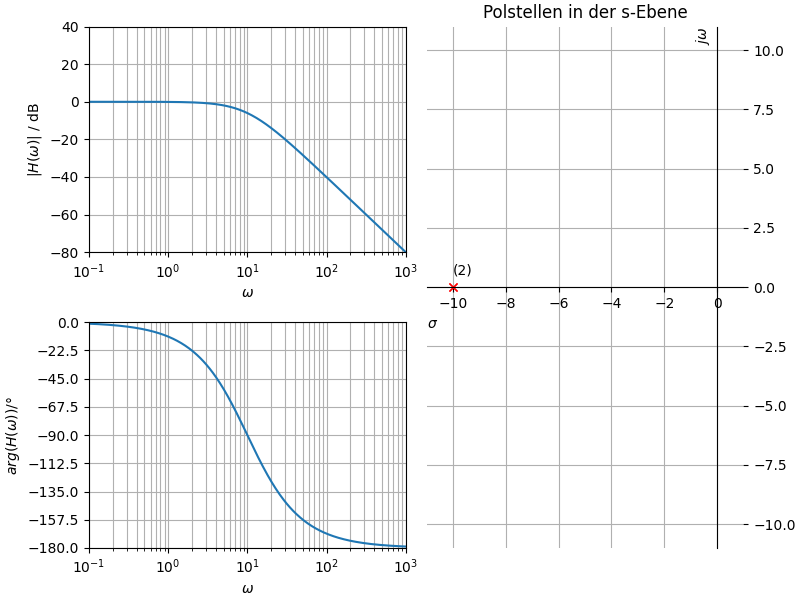

In [14]:
# (c) Benno Dömer | HS Pforzheim 2026


import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt
# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, arctan, angle, arange, logspace, linspace, zeros, ones, real, imag) # numpy für's Rechnen, bei Bedarf anpassen
from matplotlib.pyplot import (figure, plot, stem, legend, text, xscale, 
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim, yticks) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('right')
    ax.spines['left'].set_position(('data',0))

fig1 = figure(figsize=(8, 6), dpi=100, 
       layout='constrained',num='Fig1') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen
clf()

# Vektoren bauen für Omega; H(w) muss jedesmal neu gebaut werden
w = logspace(-2,3,500)#  Frequenzachse mit log-Stützstellendichte, 10^-2...10^3 => 0.01 ... 1000


def plotdata(w0,rl):
    figure('Fig1')
    H0 = 20*log10(abs(w0**2/(-(w**2) + rl * 1j * w + w0**2)))
    phi = -arctan((rl*w)/(w0**2-w**2))
    phi[(w0**2-w**2)<0]=phi[(w0**2-w**2)<0]-pi
    #abs((1j * w0 * T_RC)/(1 + 1j * w0 * T_RC))# Abs(H) bei w0
    ax = subplot(2,2,1)
    cla()
    plot(w,H0)
    grid(visible=True, which='both')

    xlim(00.1,1000)
    ylim(-80,40)
    yticks(arange(-80,41,20))
    xlabel(r'$\omega$')
    ylabel(r'$|H(\omega)|$ / dB')
    #legend('u(t)','y(t)')
    #title(r'Tiefpassfilter 2. Ordnung, Betrag')
    #myplotstyle(ax)
    xscale('log')
    
    ax = subplot(2,2,3)
    cla()
    plot(w,phi/pi*180)
    xlim(00.1,1000)
    ylim(-180,0)
    yticks(arange(-180,1,22.5))
    
    grid(visible=True, which='both')
    xscale('log')
    xlabel(r'$\omega$')
    ylabel(r'$arg(H(\omega)) / °$') 
    #title(r'Phase')

    #Pol-Nullstellen-Schema
    #Nullstellen: Keine
    #Polstelle: 
    sp1 = -rl/2+sqrt(complex(rl**2/4-w0**2));
    sp2 = -rl/2-sqrt(complex(rl**2/4-w0**2));
    ax = subplot(2,2,(2, 4))
    cla()
    plot(real(sp1),imag(sp1),'rx',real(sp2),imag(sp2),'rx')
    xlabel(r'$\sigma$',loc='left')
    ylabel(r'$j\omega$',loc='top')
    title('Polstellen in der s-Ebene')
    
    # isometric axes:
    axmax = max([4,abs(imag(sp1)),-real(sp1),-real(sp2)])+1; 
    if(abs(sp1-sp2)<0.01):
        text(real(sp1),axmax/20,'(2)')

    xlim(-axmax,1)
    ylim(-axmax,axmax)
    myplotstyle(ax)
    grid(True)
    #myplotstyle(ax)
   
# Interaktion: 
# Definition von Controls: 
w0slider  = widgets.FloatSlider(min=0.1, max=100, step=0.1, value=10, continuous_update=True, description=r'$\omega_0 / (rad/s)$')
rlslider  = widgets.FloatSlider(min=0.1, max=100, step=0.1, value=20, continuous_update=True, description='$R/L$')

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'w0': w0slider, "rl": rlslider}) 
#Anzeigen
display(w0slider,rlslider,out)
fig1.canvas.show()
